# Introduction

QA plots for the generic tracking performance

In [1]:
# imports to write dynamic markdown contents
import os
from IPython.display import display, Markdown, Latex
from IPython.display import HTML

In [2]:
# turn off/on code for the result HTML page

display(Markdown('*For the result HTML page:* '))
    
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

*For the result HTML page:* 

In [3]:
# initialization

display(Markdown('pyROOT env check:'))

import ROOT

OFFLINE_MAIN = os.getenv("OFFLINE_MAIN")
if OFFLINE_MAIN is not None:
    display(Markdown(f"via sPHENIX software distribution at `{OFFLINE_MAIN}`"))

pyROOT env check:

Welcome to JupyROOT 6.22/02


via sPHENIX software distribution at `/cvmfs/sphenix.sdcc.bnl.gov/gcc-8.3/release/release_new/new.3`

In [4]:
import subprocess

try:
    git_url = \
        subprocess.run(['git','remote','get-url','origin'], stdout=subprocess.PIPE)\
        .stdout.decode('utf-8').strip()\
        .replace('git@github.com:','https://github.com/')

    display(Markdown(f"View the source code repository at {git_url}"))
except: # catch *all* exceptions
    #     well do nothing
    pass


View the source code repository at https://github.com/sPHENIX-Collaboration/QA-gallery.git

In [5]:
display(Markdown('Some further details about the QA run, if executed under the Jenkins CI:'))

checkrun_repo_commit = os.getenv("checkrun_repo_commit")
if checkrun_repo_commit is not None:
    display(Markdown(f"* The commit being checked is {checkrun_repo_commit}"))
        
ghprbPullLink = os.getenv("ghprbPullLink")
if ghprbPullLink is not None:
    display(Markdown(f"* Link to the pull request: {ghprbPullLink}"))

BUILD_URL =  os.getenv("BUILD_URL")
if BUILD_URL is not None:
    display(Markdown(f"* Link to the build: {BUILD_URL}"))

RUN_ARTIFACTS_DISPLAY_URL = os.getenv("RUN_ARTIFACTS_DISPLAY_URL")
if RUN_ARTIFACTS_DISPLAY_URL is not None:
    display(Markdown(f"* Download the QA ROOT files: {RUN_ARTIFACTS_DISPLAY_URL}"))

JENKINS_URL  = os.getenv("JENKINS_URL")
if JENKINS_URL is not None:
    display(Markdown(f"Automatically generated by [sPHENIX Jenkins continuous integration]({JENKINS_URL}) [![sPHENIX](https://raw.githubusercontent.com/sPHENIX-Collaboration/utilities/master/jenkins/material/sphenix-logo-white-bg-72p.png)](https://www.sphenix.bnl.gov/web/) &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; [![jenkins.io](https://raw.githubusercontent.com/sPHENIX-Collaboration/utilities/master/jenkins/material/jenkins_logo_title-72p.png)](https://jenkins.io/)"))

Some further details about the QA run, if executed under the Jenkins CI:

* The commit being checked is sPHENIX-Collaboration/coresoftware/08b33387c63ed095e7aef9d15fa7b40b2042a75c

* Link to the pull request: https://github.com/sPHENIX-Collaboration/coresoftware/pull/1042

* Link to the build: https://web.sdcc.bnl.gov/jenkins-sphenix/job/sPHENIX/job/test-tracking-low-occupancy-qa/644/

* Download the QA ROOT files: https://web.sdcc.bnl.gov/jenkins-sphenix/job/sPHENIX/job/test-tracking-low-occupancy-qa/644/display/redirect?page=artifacts

Automatically generated by [sPHENIX Jenkins continuous integration](https://web.sdcc.bnl.gov/jenkins-sphenix/) [![sPHENIX](https://raw.githubusercontent.com/sPHENIX-Collaboration/utilities/master/jenkins/material/sphenix-logo-white-bg-72p.png)](https://www.sphenix.bnl.gov/web/) &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; [![jenkins.io](https://raw.githubusercontent.com/sPHENIX-Collaboration/utilities/master/jenkins/material/jenkins_logo_title-72p.png)](https://jenkins.io/)


# Initialization

In [6]:
%%cpp -d

#include "QA_Draw_Utility.C"

#include <sPhenixStyle.C>

#include <TFile.h>
#include <TLine.h>
#include <TString.h>
#include <TTree.h>
#include <cassert>
#include <cmath>

In [7]:
%%cpp

SetsPhenixStyle();
TVirtualFitter::SetDefaultFitter("Minuit2");

// test sPHENIX lib load
// gSystem->Load("libg4eval.so");

// test libs
// gSystem->ListLibraries();

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


## Inputs and file checks

In [8]:

qa_file_name_new = os.getenv("qa_file_name_new")
if qa_file_name_new is None:
    qa_file_name_new = "G4sPHENIX_test-tracking-low-occupancy-qa_Event100_Sum10_qa.root"
    display(Markdown(f"`qa_file_name_new` env not set. use the default `qa_file_name_new={qa_file_name_new}`"))

qa_file_name_ref = os.getenv("qa_file_name_ref")
if qa_file_name_ref is None:
    qa_file_name_ref = "reference/G4sPHENIX_test-tracking-low-occupancy-qa_Event100_Sum10_qa.root"
    display(Markdown(f"`qa_file_name_ref` env not set. use the default `qa_file_name_ref={qa_file_name_ref}`"))
elif qa_file_name_ref == 'None':
    qa_file_name_ref = None
    display(Markdown(f"`qa_file_name_ref` = None and we are set to not to use the reference histograms"))
    


In [9]:
# qa_file_new = ROOT.TFile.Open(qa_file_name_new);

# assert qa_file_new.IsOpen()
# qa_file_new.ls()
display(Markdown(f"Openning QA file at `{qa_file_name_new}`"))
ROOT.gInterpreter.ProcessLine(f"TFile *qa_file_new = new TFile(\"{qa_file_name_new}\");")
ROOT.gInterpreter.ProcessLine(f"const char * qa_file_name_new = \"{qa_file_name_new}\";")

if qa_file_name_ref is not None:
#     qa_file_ref = ROOT.TFile.Open(qa_file_name_ref);

#     assert qa_file_ref.IsOpen()
    display(Markdown(f"Openning QA reference file at `{qa_file_name_ref}`"))
    ROOT.gInterpreter.ProcessLine(f"TFile *qa_file_ref = new TFile(\"{qa_file_name_ref}\");")
    ROOT.gInterpreter.ProcessLine(f"const char *  qa_file_name_ref = \"{qa_file_name_ref}\";")
else:
    ROOT.gInterpreter.ProcessLine(f"TFile *qa_file_ref = nullptr;")
    ROOT.gInterpreter.ProcessLine(f"const char *  qa_file_name_ref = nullptr;")


Openning QA file at `G4sPHENIX__qa.root`

Openning QA reference file at `reference/G4sPHENIX_test-tracking-low-occupancy-qa_Event100_Sum10_qa.root`

In [10]:
%%cpp

if (qa_file_new == nullptr) 
{
    cout <<"Error, can not open QA root file"<<qa_file_name_new<<endl;
    exit(1);
}

// list inputs histograms if needed
// qa_file_new ->ls();

//TFile *qa_file_ref = NULL;
//if (qa_file_name_ref)
//{
//    qa_file_ref = new TFile(qa_file_name_ref);
//  
//    if (qa_file_ref == nullptr) 
//    {
//        cout <<"Error, can not open QA root file"<<qa_file_name_ref<<endl;
//        exit(1);
//    }
//}

# Efficiency and Purity

Tracking efficiency and purity

## Truth matched efficiency and $p_T$ resolution

Reco track matched with truth track. Please note the efficiency only require truth-reco matching in unique pairs, no cut on the reco quality is required, as defined in [`QAG4SimulationTracking::process_event(PHCompositeNode * )`](https://sphenix-collaboration.github.io/doxygen/de/dbf/classQAG4SimulationTracking.html#ac2aeab5238fcf828f70c61b4976b57fe)

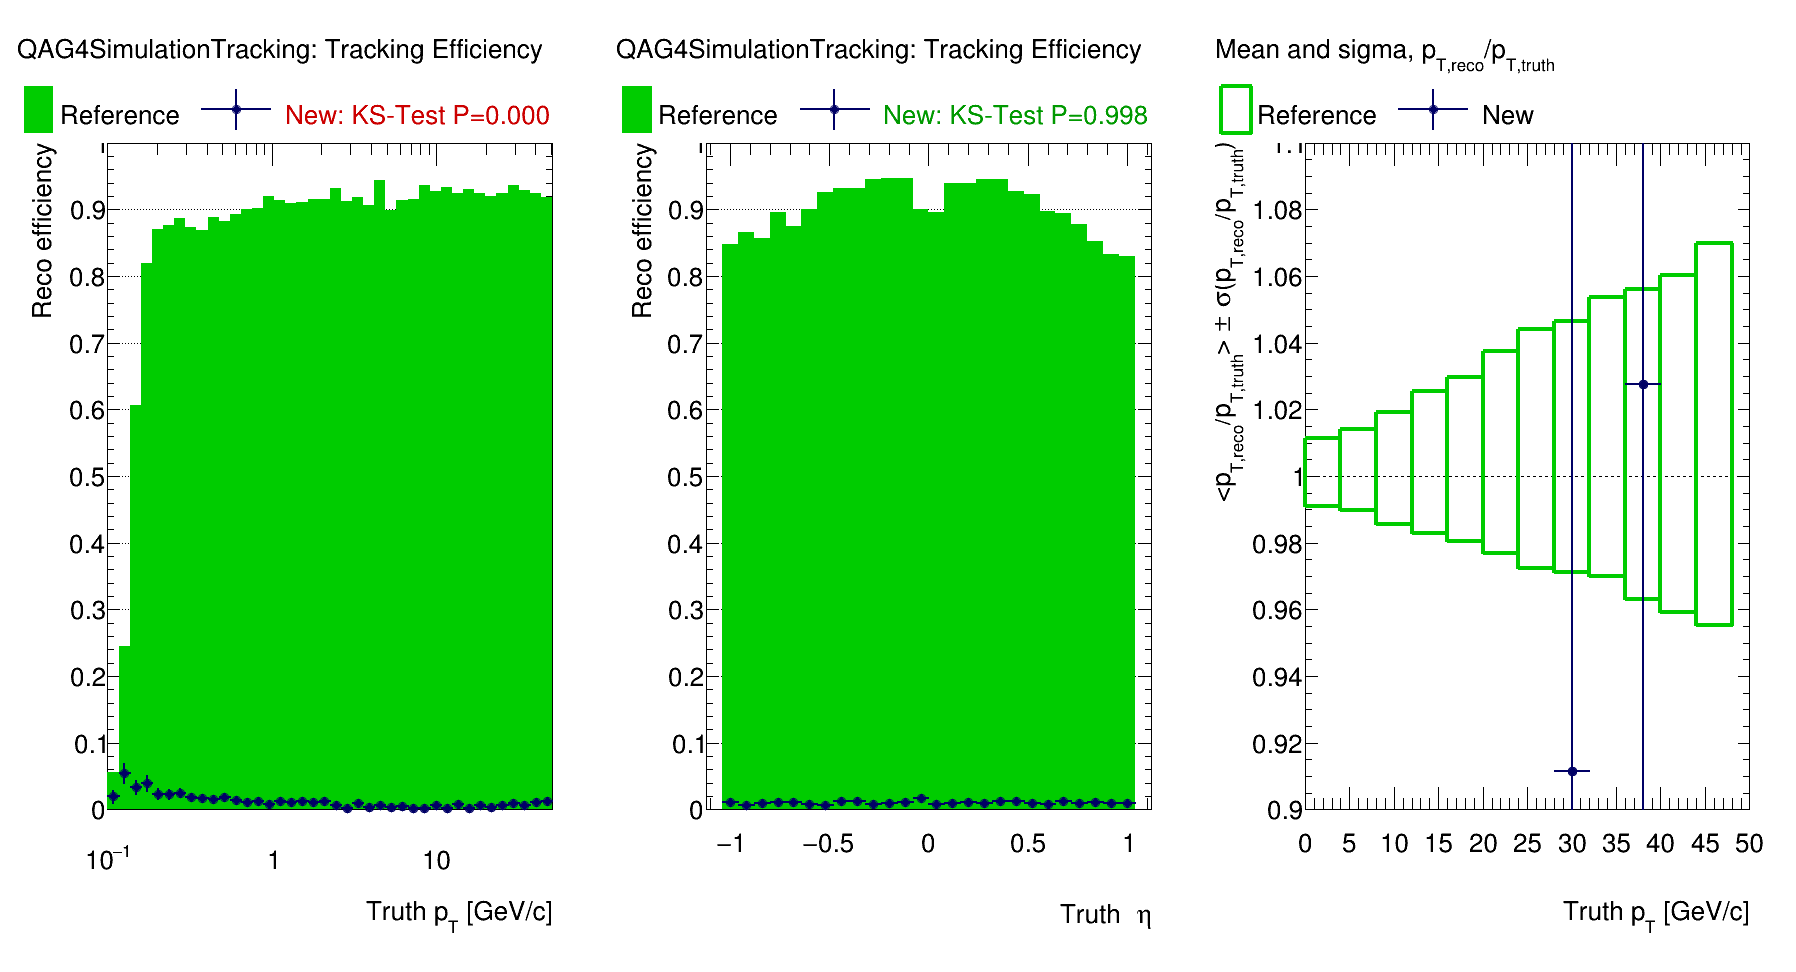

In [11]:
%%cpp

{
  //base histogram from the reco module name 
  const char *hist_name_prefix = "QAG4SimulationTracking";
  TString prefix = TString("h_") + hist_name_prefix + TString("_");
    
  // obtain normalization
  double Nevent_new = 1;
  double Nevent_ref = 1;

  TCanvas *c1 = new TCanvas(TString("QA_Draw_Tracking_TruthMatchingOverview") +
                                TString("_") + hist_name_prefix,
                            TString("QA_Draw_Tracking_TruthMatchingOverview") +
                                TString("_") + hist_name_prefix,
                            1800, 1000);
  c1->Divide(3, 1);
  int idx = 1;
  TPad *p;

  {
    static const int nrebin = 5;

    p = (TPad *)c1->cd(idx++);
    c1->Update();
    p->SetLogx();
    p->SetGridy();

    TH1 *h_pass =
        (TH1 *)qa_file_new->GetObjectChecked(prefix + "nReco_pTGen", "TH1");
    TH1 *h_norm =
        (TH1 *)qa_file_new->GetObjectChecked(prefix + "nGen_pTGen", "TH1");
    assert(h_norm);
    assert(h_pass);

    h_norm->Rebin(nrebin);
    h_pass->Rebin(nrebin);

    TH1 *h_ratio = GetBinominalRatio(h_pass, h_norm);

    //    h_ratio->GetXaxis()->SetRangeUser(min_Et, max_Et);
    h_ratio->GetYaxis()->SetTitle("Reco efficiency");
    h_ratio->GetYaxis()->SetRangeUser(-0, 1.);

    TH1 *h_ratio_ref = NULL;
    if (qa_file_ref) {
      TH1 *h_pass =
          (TH1 *)qa_file_ref->GetObjectChecked(prefix + "nReco_pTGen", "TH1");
      TH1 *h_norm =
          (TH1 *)qa_file_ref->GetObjectChecked(prefix + "nGen_pTGen", "TH1");
      assert(h_norm);
      assert(h_pass);
      h_norm->Rebin(nrebin);
      h_pass->Rebin(nrebin);
      h_ratio_ref = GetBinominalRatio(h_pass, h_norm);
    }

    h_ratio->SetTitle(TString(hist_name_prefix) + ": Tracking Efficiency");

    DrawReference(h_ratio, h_ratio_ref, false);
  }

  {
    static const int nrebin = 4;

    p = (TPad *)c1->cd(idx++);
    c1->Update();
    // p->SetLogx();
    p->SetGridy();

    TH1 *h_pass =
        (TH1 *)qa_file_new->GetObjectChecked(prefix + "nReco_etaGen", "TH1");
    TH1 *h_norm =
        (TH1 *)qa_file_new->GetObjectChecked(prefix + "nGen_etaGen", "TH1");
    assert(h_norm);
    assert(h_pass);

    h_norm->Rebin(nrebin);
    h_pass->Rebin(nrebin);

    TH1 *h_ratio = GetBinominalRatio(h_pass, h_norm);

    h_ratio->GetXaxis()->SetRangeUser(-1.1, 1.1);
    h_ratio->GetYaxis()->SetTitle("Reco efficiency");
    h_ratio->GetYaxis()->SetRangeUser(-0, 1.);

    TH1 *h_ratio_ref = NULL;
    if (qa_file_ref) {
      TH1 *h_pass =
          (TH1 *)qa_file_ref->GetObjectChecked(prefix + "nReco_etaGen", "TH1");
      TH1 *h_norm =
          (TH1 *)qa_file_ref->GetObjectChecked(prefix + "nGen_etaGen", "TH1");
      assert(h_norm);
      assert(h_pass);
      h_norm->Rebin(nrebin);
      h_pass->Rebin(nrebin);
      h_ratio_ref = GetBinominalRatio(h_pass, h_norm);
    }

    h_ratio->SetTitle(TString(hist_name_prefix) + ": Tracking Efficiency");

    DrawReference(h_ratio, h_ratio_ref, false);
  }

  {
    p = (TPad *)c1->cd(idx++);
    c1->Update();
    //    p->SetLogx();
    TH1 *frame = p->DrawFrame(0, .9, 50, 1.1,
                              "Mean and sigma, p_{T,reco}/p_{T,truth};Truth p_{T} [GeV/c];<p_{T,reco}/p_{T,truth}> #pm #sigma(p_{T,reco}/p_{T,truth})");
    //gPad->SetLeftMargin(.2);
    gPad->SetTopMargin(-1);
    frame->GetYaxis()->SetTitleOffset(1.7);
    //TLine *l = new TLine(0, 1, 50, 1);
    //l->SetLineColor(kGray);
    //l->Draw();
    HorizontalLine( gPad, 1 )->Draw();

    TH2 *h_QAG4SimulationTracking_pTRecoGenRatio_pTGen =
        (TH2 *)qa_file_new->GetObjectChecked(prefix + "pTRecoGenRatio_pTGen",
                                             "TH2");
    assert(h_QAG4SimulationTracking_pTRecoGenRatio_pTGen);

    h_QAG4SimulationTracking_pTRecoGenRatio_pTGen->Rebin2D(16, 1);

    TGraphErrors *ge_QAG4SimulationTracking_pTRecoGenRatio_pTGen =
        FitProfile(h_QAG4SimulationTracking_pTRecoGenRatio_pTGen);
    ge_QAG4SimulationTracking_pTRecoGenRatio_pTGen->Draw("pe");
    ge_QAG4SimulationTracking_pTRecoGenRatio_pTGen->SetTitle(
        "Mean and sigma, p_{T,reco}/p_{T,truth}");

    TGraphErrors *h_ratio_ref = NULL;
    if (qa_file_ref) {
      TH2 *h_QAG4SimulationTracking_pTRecoGenRatio_pTGen =
          (TH2 *)qa_file_ref->GetObjectChecked(prefix + "pTRecoGenRatio_pTGen",
                                               "TH2");
      assert(h_QAG4SimulationTracking_pTRecoGenRatio_pTGen);

      h_QAG4SimulationTracking_pTRecoGenRatio_pTGen->Rebin2D(16, 1);

      h_ratio_ref = FitProfile(h_QAG4SimulationTracking_pTRecoGenRatio_pTGen);
      ge_QAG4SimulationTracking_pTRecoGenRatio_pTGen->Draw("pe");
    }

    DrawReference(ge_QAG4SimulationTracking_pTRecoGenRatio_pTGen, h_ratio_ref,
                  true);
  }

  //SaveCanvas(c1,
  //           TString(qa_file_name_new) + TString("_") + TString(c1->GetName()),
  //           true);
    
  c1->Draw();
}


## Reco tower jet spectrum

Jet the details of the reco tower jet in response to this single particle